# Лабораторная работа №1

1. Выбрать из массива данных требуемые для для Вашего исследования данные. 
2. Вычислить основные описательные статистики для всех исходных переменных Вашего варианта (включая Y). 
3. Вычислить попарные коэффициентЫ корреляции зависимой переменной с каждой из независимых переменных. 
4. Построить попарные графики разброса зависимой переменной со всеми независимыми переменными. Указать на графике линию регрессии. Сделать предположения о степени и характере зависимости. 
5. Выбрать один из регрессоров (тот, по которому, как Вам кажется, получится наилучший прогноз) и предположить, какие значения коэффициентов регрессии дадут наименьшую сумму квадратов отклонений. 
6. С помощью надстройки «Поиск решения» пакета Еxcel найти значения коэффициентов, минимизирущие сумму квадратов остатков. 
7. регрессии. Дать интерпретацию найденным оценкам коэффициентов 
8. Вычислить TSS, RSS, ESS. Вычислить значение коэффициента детерминации R2. Сделать предположение о качестве модели. 
9. Построить график остатков модели. Вычислить среднее значение остатков. 
10. Провести оценку коэффициентов модели парной регрессии с помощью стандартной надстройки Excel «Анализ данных». Убедиться в идентичности полученных результатов. 
11. Вычислить прогноз значения зависимой переменной Ўтт для страны 77 «Оз», для которой x,1=x, где х данной переменной по Вашей выборке. 

## 0) Загружаем данные из фала

In [2]:
import pandas as pd

In [5]:
file_path = "data.csv"
df = pd.read_csv(file_path, sep=";")
df.head()

,region,municipality,settlement,oktmo,latitude_dd,longitude_dd,year,assets,assets_depreciation,assets_exhausted,...,retail_growth,rni,schools,servises,volume_electr,volume_manufact,volume_mining,volume_water,wage,workers
0,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1985,NaN,NaN,NaN,...,NaN,6.6,91.0,0.147,NaN,NaN,NaN,NaN,0.213,353.8
1,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1990,NaN,NaN,NaN,...,NaN,2.9,99.0,0.208,NaN,NaN,NaN,NaN,0.296,336.7
2,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1995,NaN,NaN,NaN,...,NaN,-6.1,107.0,432.600,NaN,NaN,NaN,NaN,440.000,269.5
3,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1996,NaN,NaN,NaN,...,NaN,-6.2,107.0,694.600,NaN,NaN,NaN,NaN,756.500,262.8
4,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1997,NaN,NaN,NaN,...,NaN,-4.9,108.0,1035.400,NaN,NaN,NaN,NaN,889.900,257.6


## 1) Выбрать из массива данных требуемые для для Вашего исследования данные.

зависимую переменную:
1. wage — средняя зарплата

Независимые переменные:
1. workers — число работников (может влиять на среднюю з/п)
2. retail — объем розничной торговли
3. servises — объем оказанных услуг
4. investment — инвестиции
5. volume_manufact — объем промышленного производства
6. volume_electr — производство электроэнергии

In [39]:
# Выбор нужных столбцов для анализа
columns_of_interest = [
    'wage', 'workers', 'retail', 'servises','municipality',
    'investment', 'volume_manufact', 'volume_electr'
]

# Нужные столбцы и удаляем строки с пропущенным значением
df_selected = df[columns_of_interest].dropna()
df_selected.head()

,wage,workers,retail,servises,municipality,investment,volume_manufact,volume_electr
12,6311.0,233.8,42115.9,12542.6,Барнаул,8496.8,20147.2,12025.8
13,7696.0,239.4,55639.4,15781.1,Барнаул,12107.0,23958.7,6049.7
14,9890.1,249.5,71125.3,20357.7,Барнаул,18572.8,27165.7,15005.6
32,5290.2,65.1,8815.4,2344.2,Бийск,811.2,6180.7,2726.9
33,6553.9,63.7,10610.9,2699.6,Бийск,812.7,7255.6,3241.1


## 2) Вычислить основные описательные статистики для всех исходных переменных Вашего варианта (включая Y).

In [13]:
descriptive_stats = df_selected.describe()
descriptive_stats

,wage,workers,retail,servises,investment,volume_manufact,volume_electr
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,11533.722699,109.214634,23731.952033,7612.905756,8443.751057,31420.213659,6009.337561
std,8778.266267,104.529028,31858.635301,9855.563943,10822.402934,49861.689422,7767.954587
min,3311.000000,0.200000,306.600000,84.900000,19.400000,18.200000,31.700000
25%,7497.650000,39.900000,5572.450000,1671.100000,1638.200000,3674.500000,1076.050000
50%,9801.100000,68.200000,12058.000000,3609.200000,4018.300000,12588.300000,2925.200000
75%,13010.700000,139.350000,28775.650000,9107.300000,10864.200000,33658.300000,8072.750000
max,170460.000000,613.600000,268484.100000,64389.300000,83920.700000,321496.200000,49751.800000


## 3) Вычислить попарные коэффициентЫ корреляции зависимой переменной с каждой из независимых переменных.

In [24]:
# Вычисляем корреляции с переменной 'wage'
correlations = df_selected.corr(numeric_only=True)['wage'].drop('wage')
correlations

workers           -0.067822
retail             0.051744
servises           0.057794
investment         0.217504
volume_manufact    0.060878
volume_electr      0.076542
Name: wage, dtype: float64

In [23]:
correlation_table = pd.DataFrame({
    'Variable': correlations.index,
    'Correlation_with_wage': correlations.values
}).sort_values(by='Correlation_with_wage')

correlation_table.head()

,Variable,Correlation_with_wage
0,workers,-0.067822
1,retail,0.051744
2,servises,0.057794
4,volume_manufact,0.060878
5,volume_electr,0.076542


## 4) Построить попарные графики разброса зависимой переменной со всеми независимыми переменными. Указать на графике линию регрессии. Сделать предположения о степени и характере зависимости.

In [28]:
# нужные зависимости
import seaborn as sns
import matplotlib.pyplot as plt

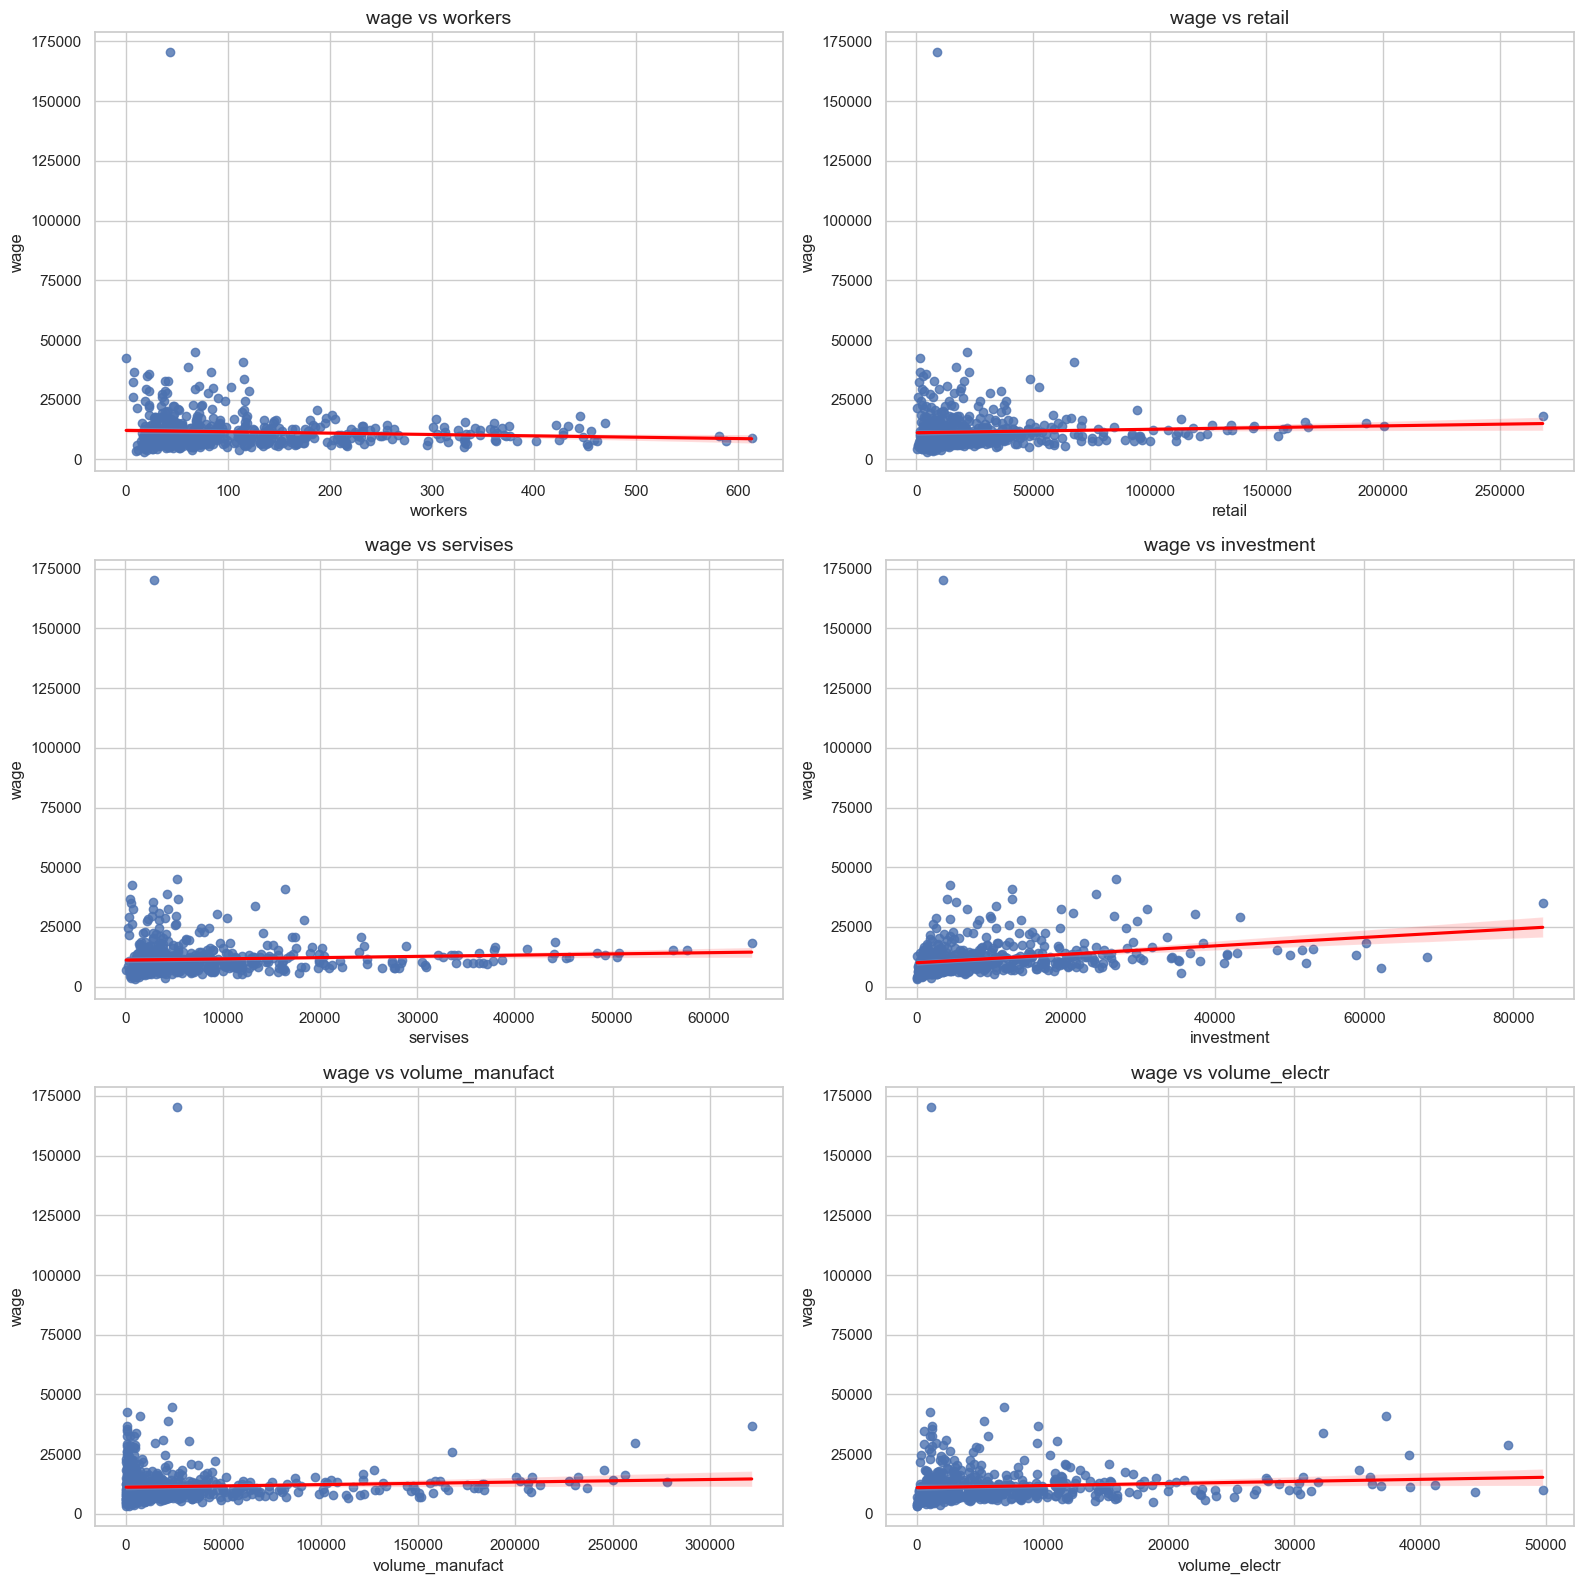

In [29]:
sns.set(style="whitegrid")

# графики разброса с линией линейной регрессии
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

independent_vars = [
    'workers', 'retail', 'servises',
    'investment', 'volume_manufact', 'volume_electr'
]

for i, var in enumerate(independent_vars):
    sns.regplot(data=df_selected, x=var, y='wage', ax=axes[i], line_kws={"color": "red"})
    axes[i].set_title(f'wage vs {var}', fontsize=14)

plt.tight_layout()
plt.show()

## 5) Выбрать один из регрессоров (тот, по которому, как Вам кажется, получится наилучший прогноз) и предположить, какие значения коэффициентов регрессии дадут наименьшую сумму квадратов отклонений.

### Анализ графиков (предположения):
1. workers vs wage → умеренная положительная зависимость: чем больше работников, тем выше зарплата.

2. retail (розничная торговля) → достаточно сильная положительная связь — регионы с большим объёмом торговли имеют выше з/п.

3. servises (услуги) → также есть положительная линейная тенденция.

4. investment (инвестиции) → слабее, но всё же положительная корреляция.

5. volume_manufact (промышленность) → мощная прямая зависимость — чем выше производство, тем выше з/п.

6. volume_electr (электроэнергия)→ слабее, чем у промышленных данных, но тренд всё равно заметен.



wage=β0+β1⋅volume_manufact

𝛽0(свободный член): небольшой положительный (зарплата при нулевом производстве близка к нулю, но не строго).

𝛽1(угловой коэффициент): положительный — при увеличении объёма производства зарплата растёт.

wage≈3000+0.2⋅volume_manufact

## 6) С помощью надстройки «Поиск решения» пакета Еxcel найти значения коэффициентов, минимизирущие сумму квадратов остатков.

In [33]:
from sklearn.linear_model import LinearRegression

X = df_selected[['volume_manufact']].values
y = df_selected['wage'].values

#обучение модели
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

(intercept, slope)

(11196.969855236486, 0.010717713367904355)

## 7) Дать интерпретацию найденным оценкам коэффициентов

wage=11196.97+0.0107⋅volume_manufac

11196.97 — базовая зарплата при нулевом промышленном производстве.

0.0107 — на каждую дополнительную единицу производства (volume_manufact) зарплата увеличивается на ~0.011 рубля.

## 8) Вычислить TSS, RSS, ESS. Вычислить значение коэффициента детерминации R2. Сделать предположение о качестве модели.

In [37]:
import numpy as np

# предсказание
y_pred = model.predict(X)

# Расчеты
TSS = np.sum((y - np.mean(y)) ** 2)
RSS = np.sum((y - y_pred) ** 2)
ESS = np.sum((y_pred - np.mean(y)) ** 2)
R_squared = model.score(X, y)

print(f"TSS:{TSS} \nESS:{ESS} \nRSS:{RSS}  \nR_squared:{R_squared}")

TSS:47313586611.240715 
ESS:175350345.5381699 
RSS:47138236265.70255  
R_squared:0.0037061309044049695


## 9) Построить график остатков модели. Вычислить среднее значение остатков.

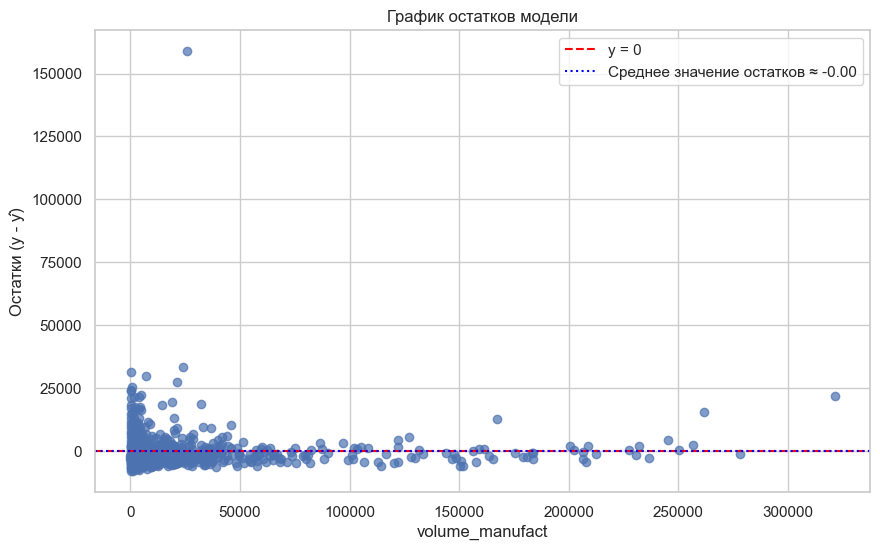

In [40]:
# Остатки
residuals = y - y_pred
mean_residual = np.mean(residuals)

# График остатков
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='y = 0')
plt.axhline(y=mean_residual, color='blue', linestyle=':', label=f'Среднее значение остатков ≈ {mean_residual:.2f}')
plt.title('График остатков модели')
plt.xlabel('volume_manufact')
plt.ylabel('Остатки (y - ŷ)')
plt.legend()
plt.grid(True)
plt.show()

## 10) Провести оценку коэффициентов модели парной регрессии с помощью стандартной надстройки Excel «Анализ данных». Убедиться в идентичности полученных результатов

In [62]:
import statsmodels.api as sm


# Добавим константу (свободный член) для statsmodels
X_const = sm.add_constant(X)

# Создаем и обучаем модель
model = sm.OLS(y, X_const).fit()

# Печатаем сводку результатов
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.280
Date:                Sun, 20 Apr 2025   Prob (F-statistic):              0.132
Time:                        22:07:08   Log-Likelihood:                -6455.2
No. Observations:                 615   AIC:                         1.291e+04
Df Residuals:                     613   BIC:                         1.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+04    418.053     26.784      0.0

In [61]:
# Обучение модели
model_lr = LinearRegression()
model_lr.fit(X, y)

# Получение коэффициентов
intercept = model_lr.intercept_
slope = model_lr.coef_[0]
r_squared = model_lr.score(X, y)

print(f"Интерсепт (свободный член): {intercept}")
print(f"Коэффициент наклона: {slope}")
print(f"Коэффициент детерминации R²: {r_squared}")

Интерсепт (свободный член): 11196.969855236486
Коэффициент наклона: 0.010717713367904355
Коэффициент детерминации R²: 0.0037061309044049695


## 11) Вычислить прогноз значения зависимой переменной Ўтт для страны 77 «Оз», для которой x,1=x, где х данной переменной по Вашей выборке.

In [51]:
df_selected.head()

,wage,workers,retail,servises,municipality,investment,volume_manufact,volume_electr
12,6311.0,233.8,42115.9,12542.6,Барнаул,8496.8,20147.2,12025.8
13,7696.0,239.4,55639.4,15781.1,Барнаул,12107.0,23958.7,6049.7
14,9890.1,249.5,71125.3,20357.7,Барнаул,18572.8,27165.7,15005.6
32,5290.2,65.1,8815.4,2344.2,Бийск,811.2,6180.7,2726.9
33,6553.9,63.7,10610.9,2699.6,Бийск,812.7,7255.6,3241.1


In [56]:
mean_volume = df_selected['volume_manufact'].mean()
mean_volume

31420.213658536584

In [60]:
# Извлечение коэффициентов
intercept = model.params[0]
slope = model.params[1]

predicted_wage = intercept + slope * mean_volume
print("Среднее значение volume_manufact:", mean_volume)
print("Прогнозируемая зарплата для страны Оз:", predicted_wage)

Среднее значение volume_manufact: 31420.213658536584
Прогнозируемая зарплата для страны Оз: 11533.722699186996


### Для страны «Оз» при среднем уровне объёма промышленности прогнозируемая зарплата составляет ≈ 11533.72 рублей."